### 단축기 사용법
- 실행단축키
  - ctrl + Enter : 실행 후 커서 그대로 있음
  - Shift + Enter : 실행 후 커서 아래 셀로 이동

- 코드셀 -> 마크다운 변환
  - Ctrl + m + m
- 마크다운셀 -> 코드셀 변환
  - Ctrl + m + y
- 현재 셀 아래에 셀 추가
  - Ctrl + m + b
- 현재 셀 위에 셀 추가
  - Ctrl + m + a
- 셀 삭제하기
  - Ctrl + m + d

### 딥러닝이란?
- 인간의 신경망을 모방하여 학습과 예측을 하는 기술
- 대량의 데이터에서 복잡한 패턴, 규칙을 찾아내는 능력이 뛰어나다!
- 머신러닝에 비해 조금 더 유연한 사고를 한다
- 인간의 뉴런 == 딥러닝에서 선형모델(y = wx + b)
- 주로 영상처리, 음성처리, 이미지분야 사용

### tensorflow
- google이 만든 딥러닝을 위한 라이브러리

### keras
- tensorflow 위에서 작동하는 라이브러리로 사용자 친화형 API

In [ ]:
# 텐서플로우 불러오기
import tensorflow as tf

# 텐서플로우 버전 확인하기
print(tf.__version__) # 언더바 두개
# 설치버전 확인 이유: 프로젝트 진행시 오픈소스 사용시 버전 일치해야함 -> 불일치시 충돌위험

2.15.0


In [ ]:
# 드라이브 마운트 (구글 드라이브와의 연결)
# 파일을 불러올 때 드라이브 마운트 후 데이터 접근가능

# 현재 작업 디렉토리 확인 (리눅스 명령어 사용 / 리눅스 기반의 코랩)
!pwd # print work directory

/content/drive/MyDrive/Colab Notebooks/DeepLearning


In [ ]:
# 현재 작업 디렉토리의 파일 목록 조회
!ls #list segments

data  ex01_딥러닝맛보기.ipynb


In [ ]:
# 작업 디렉토리 변경을 위해서 드라이브 마운트
# 작업 디렉토리변경 (change directory)
%cd '/content/drive/MyDrive/Colab Notebooks/DeepLearning'

/content/drive/MyDrive/Colab Notebooks/DeepLearning


In [ ]:
# 현재 작업 위치 확인
!pwd

/content/drive/MyDrive/Colab Notebooks/DeepLearning


In [ ]:
!ls

data  ex01_딥러닝맛보기.ipynb


### 머신러닝과 딥러닝 모델 비교
- 실습
  - 똑같은 데이터를 가지고 머신러닝, 딥러닝 모델링을 통해서 차이점 알아보기!
  - 공부시간에 따른 학생의 성적 예측하는 회귀모델 실습

### 머신러닝 모델과 딥러닝 모델의  차이점
- 머신러닝
  - 모델생성(완성된 객체 사용) > 모델학습 > 모델예측 > 모델평가
  - 완제품로봇 - 팔정도만 움직일 수 있음 (하이퍼파라미터 조절)

- 딥러닝
  - 모델생성(모델을 직접 구성) > 모델학습 > 모델예측 > 모델평가
  - 조립식 ㄹ봇, 레고블럭 (우리가 구성하고자 하는 모양으로 구성 가능)
  - 다양한 결과를 만들어 낼 수 있음

### 머신러닝 실습

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 데이터 불러오기!
data = pd.read_csv('data/student-mat.csv', delimiter=';')
data

# 정답레이블로 사용할 컬럼: G3 (3학년 성적)
# 문제데이터로 사용할 컬럼: studytime (공부시간)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### 문제 정답 분리
- 입력특성(X) : studytime
- 정답 (y) : G3

In [ ]:
# 문제, 정답 분리
X = data['studytime']
y = data['G3']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=23)

In [ ]:
# 크기확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(276,) (276,)
(119,) (119,)


In [ ]:
# 머신러닝 모델링
# 머신러닝 모델 불러오기 (LinearRegression)
from sklearn.linear_model import LinearRegression
# 평가지표 불러오기 (mse)
from sklearn.metrics import mean_squared_error

In [ ]:
#1. 모델객체생성
linear_model = LinearRegression()
#2. 모델학습 model.fit(훈련용문제, 훈련용정답)    주의 문제데이터는 반드시 2차원
# X_train.values.reshape(-1,1)
linear_model.fit(X_train.values.reshape(-1,1), y_train)
#3. 모델예측
pre = linear_model.predict(X_test.values.reshape(-1,1))
#4. 모델평가
error = mean_squared_error(y_test,pre)**0.5
print("mse: ", error)

mse:  4.84191068677662


### 딥러닝 실습
- 신경망모델 만들기
  1. 신경망의 구조 설계(오늘은 단층으로만 구성)
    - 뼈대생성
    - 입력층
    - 중간층(은닉층)
    - 출력층
  2. 신경망 학습방법 및 평가방법 설정
  3. 신경망 모델 학습
  4. 신경망 모델 예측 및 평가

In [ ]:
# tensorflow 모델링 도구 불러오기
# tenserflow 위에 keras  사용
from tensorflow.keras import Sequential  # 모델의 뼈대
# 신경망의 구성요소 (입력층)
from tensorflow.keras.layers import InputLayer, Dense, Activation
# inputLayer: 입력층
# Dense: 밀집도, 중간층 쌓을때 사용
# Activation: 활성화함수 (인간을 모방하기 위해서 사용하는 함수)

In [ ]:
# 1. 신경망 구조 설계
# 뼈대 생성
model =Sequential()
# add 기능을 통해서 층을 하나씩 추가해 나갈 예정

# 입력층 쌓기
model.add(InputLayer(input_shape = (1,))) # 입력특성(속성 등?)의 개수를 설정해주어야 한다. (공부시간)

#중간층(은닉층) 쌓기 -> 오늘은 단층설계
model.add(Dense(units = 10)) # 10개의 선형모델을 한개의 층에 사용하겠다
model.add(Activation('sigmoid')) # 활성화함수로 시그모이드 함수를 사용하겠다

# 출력층 설계 -> 출력받고자 하는 데이터의 형태 설계 -> 예측데이터의 형태
model.add(Dense(units = 1, activation= 'linear'))
# 성적을 예측하기 때문에 1개의 결과값을 출력받으면됨. unit = 1
# 출력하고자하는 데이터의 형태 -> 연속형 데이터 (변환이 필요가 없음)
# 하지만 우리가 틀을 맞춰주기 위해서 activation을 적어준다면 linear (default)
# linear (항등함수, y=x)

In [ ]:
#2. 신경망모델 학습방법 및 평가방법 설정
model.compile(loss = 'mean_squared_error', # 모델의 오차를 측정하는 수치 설정
              optimizer = 'SGD', # 모델의 최적화 방법 설정 (확률적경사하강법)
               metrics = ['mse']) # 모델 학습시 평가 지표

In [ ]:
#3. 모델 학습
h1= model.fit(X_train, y_train,
          validation_split = 0.2, # 훈련데이터 내에서 20%를 검증데이터로 활용
          epochs = 20) # 모델의 최적화 횟수 (w,b값 업데이트 횟수)

# 모델학습 로그 출력을 위해서 h1변수에 대입
# 학습패턴 확인을 위함

Epoch 1/20
7/7 [==============================] - 0s 21ms/step - loss: 64.9276 - mse: 64.9276 - val_loss: 42.9940 - val_mse: 42.9940
Epoch 2/20
7/7 [==============================] - 0s 7ms/step - loss: 28.5821 - mse: 28.5821 - val_loss: 25.7983 - val_mse: 25.7983
Epoch 3/20
7/7 [==============================] - 0s 8ms/step - loss: 20.8133 - mse: 20.8133 - val_loss: 22.4816 - val_mse: 22.4816
Epoch 4/20
7/7 [==============================] - 0s 5ms/step - loss: 19.7711 - mse: 19.7711 - val_loss: 21.6135 - val_mse: 21.6135
Epoch 5/20
7/7 [==============================] - 0s 8ms/step - loss: 19.5977 - mse: 19.5977 - val_loss: 21.7515 - val_mse: 21.7515
Epoch 6/20
7/7 [==============================] - 0s 10ms/step - loss: 19.6384 - mse: 19.6384 - val_loss: 21.6107 - val_mse: 21.6107
Epoch 7/20
7/7 [==============================] - 0s 8ms/step - loss: 19.5266 - mse: 19.5266 - val_loss: 21.5033 - val_mse: 21.5033
Epoch 8/20
7/7 [==============================] - 0s 8ms/step - loss: 19.6

In [ ]:
# 4. 모델 예측 및 평가
model.evaluate(X_test, y_test)
# 머신러닝에서 score와 같은 기능을 함

# mse: 약 23.4256 오차
# 머신러닝에서의 오차: 23.444

# 머신러닝 학습과 딥러닝 학습에서 큰 차이가 없음을 확인
# 데이터와 상황에 따라서 모델을 선택하기!

4/4 [==============================] - 0s 2ms/step - loss: 23.3756 - mse: 23.3756


[23.375648498535156, 23.375648498535156]

- 학습의 결과 시각화

In [ ]:
h1.history['loss']

[64.9276351928711,
 28.582130432128906,
 20.81328773498535,
 19.77106475830078,
 19.597732543945312,
 19.63844108581543,
 19.52655792236328,
 19.6063232421875,
 19.597454071044922,
 19.58641242980957,
 19.615814208984375,
 19.537803649902344,
 19.516704559326172,
 19.6307430267334,
 19.561866760253906,
 19.51894760131836,
 19.553529739379883,
 19.553573608398438,
 19.56598663330078,
 19.588134765625]

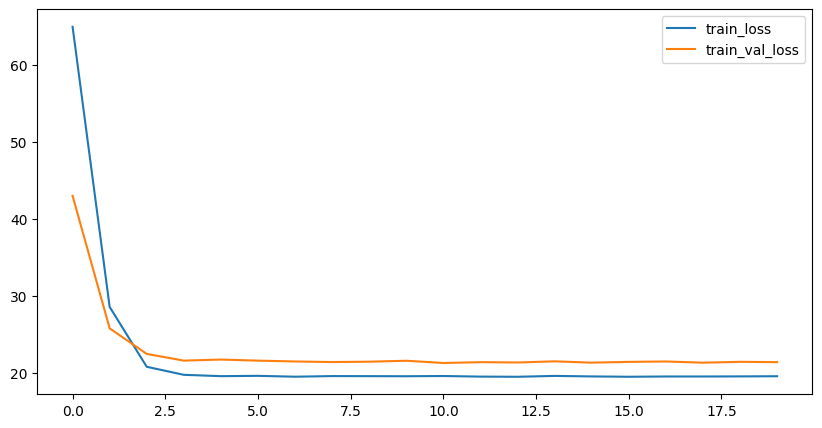

In [ ]:
# loss 값 변화 시각화
plt.figure(figsize = (10,5))
plt.plot(h1.history['loss'], label = 'train_loss')
plt.plot(h1.history['val_loss'], label = 'train_val_loss')
plt.legend()
plt.show()

- 입력특성 2개 골라서 학습 및 평가 진행
- 설정시 변경할 것
  - X 문제데이터 설정
  - inputLayer 수정
  - 학습의 능력을 올리고 싶다면 Dense units의 수 수정

In [ ]:
# X 문제데이터의 특성 선택 (2개 특성)
X = data[['Medu', 'Fedu']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=23)
# 숫자형태의 데이터로만 가능
# 문자열 데이터를 쓰고 싶다면 인코딩 해줘야함

In [ ]:
# 1. 신경망 구조설계
model2 = Sequential()
model2.add(InputLayer(input_shape=(2,))) # 입력특성이 2개이므로 2
model2.add(Dense(units = 10)) # 선형모델 10개 사용
model2.add(Activation('sigmoid'))
model2.add(Dense(units = 1))
# 2. 신경망모델 학습방법 및 평가방법 설정
model2.compile(loss = 'mean_squared_error', # 모델의 오차를 측정하는 수치 설정
              optimizer = 'SGD', # 모델의 최적화 방법 설정 (확률적경사하강법)
               metrics = ['mse'])
# 3. 학습
h2 = model2.fit(X_train,y_train,validation_split = 0.2,
          epochs = 20)
# 4. 평가
model2.evaluate(X_test, y_test)

Epoch 1/20
7/7 [==============================] - 0s 22ms/step - loss: 105.0549 - mse: 105.0549 - val_loss: 87.1083 - val_mse: 87.1083
Epoch 2/20
7/7 [==============================] - 0s 5ms/step - loss: 62.7180 - mse: 62.7180 - val_loss: 51.3997 - val_mse: 51.3997
Epoch 3/20
7/7 [==============================] - 0s 6ms/step - loss: 36.5486 - mse: 36.5486 - val_loss: 32.5645 - val_mse: 32.5645
Epoch 4/20
7/7 [==============================] - 0s 8ms/step - loss: 25.1314 - mse: 25.1314 - val_loss: 25.1429 - val_mse: 25.1429
Epoch 5/20
7/7 [==============================] - 0s 5ms/step - loss: 21.1608 - mse: 21.1608 - val_loss: 22.3128 - val_mse: 22.3128
Epoch 6/20
7/7 [==============================] - 0s 8ms/step - loss: 19.8723 - mse: 19.8723 - val_loss: 21.0935 - val_mse: 21.0935
Epoch 7/20
7/7 [==============================] - 0s 8ms/step - loss: 19.4715 - mse: 19.4715 - val_loss: 20.6981 - val_mse: 20.6981
Epoch 8/20
7/7 [==============================] - 0s 9ms/step - loss: 19.

[22.58378791809082, 22.58378791809082]

In [ ]:
h2.history['loss']

[105.05485534667969,
 62.71796798706055,
 36.5485954284668,
 25.131404876708984,
 21.160751342773438,
 19.872268676757812,
 19.471515655517578,
 19.38530731201172,
 19.315759658813477,
 19.319826126098633,
 19.283432006835938,
 19.257484436035156,
 19.253543853759766,
 19.228193283081055,
 19.282297134399414,
 19.306516647338867,
 19.240617752075195,
 19.190521240234375,
 19.214656829833984,
 19.23220443725586]

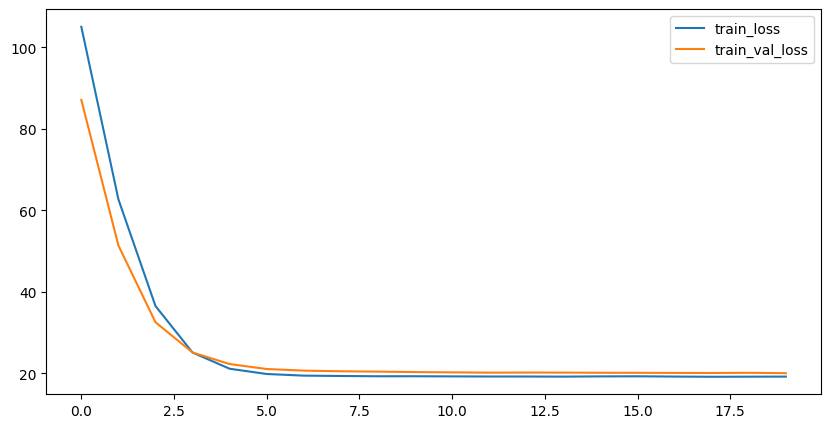

In [ ]:
# 시각화
plt.figure(figsize = (10,5))
plt.plot(h2.history['loss'], label = 'train_loss')
plt.plot(h2.history['val_loss'], label = 'train_val_loss')
plt.legend()
plt.show()